In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## Load and Inspect Data

Make sure `anies_df` is loaded in your environmen


In [3]:
## Uncomment for using Colab VM
# !git clone https://github.com/Rivooooo/sentiment_analysis_2024_presidential_campaign.git

In [4]:
## Uncomment for using Colab VM
# %cd sentiment_analysis_2024_presidential_campaign

In [5]:
## Uncomment for using Colab VM
# anies_df = pd.read_csv("/content/sentiment_analysis_2024_presidential_campaign/dataset/cleaned data/Anies Baswedan.csv")
# ganjar_df = pd.read_csv("/content/sentiment_analysis_2024_presidential_campaign/dataset/cleaned data/Ganjar Pranowo.csv")
# prabowo_df = pd.read_csv("/content/sentiment_analysis_2024_presidential_campaign/dataset/cleaned data/Prabowo Subianto.csv")


anies_df = pd.read_csv(r"C:\Users\hp\Documents\Python Project\Sentiment Analysis\sentiment_analysis_2024_presidential_campaign\dataset\cleaned data\Anies Baswedan.csv")
ganjar_df = pd.read_csv(r"C:\Users\hp\Documents\Python Project\Sentiment Analysis\sentiment_analysis_2024_presidential_campaign\dataset\cleaned data\Ganjar Pranowo.csv")
prabowo_df = pd.read_csv(r"C:\Users\hp\Documents\Python Project\Sentiment Analysis\sentiment_analysis_2024_presidential_campaign\dataset\cleaned data\Prabowo Subianto.csv")

In [6]:
anies_df = anies_df[['tweet_tokens_stemmed','label']]
ganjar_df = ganjar_df[['tweet_tokens_stemmed','label']]
prabowo_df = prabowo_df[['tweet_tokens_stemmed','label']]

In [7]:
# Display basic information about the dataset
print("Dataset Shape:", anies_df.shape)
print("\nColumn Names:", anies_df.columns.tolist())
print("\nFirst few rows:")
anies_df.head()


Dataset Shape: (8856, 2)

Column Names: ['tweet_tokens_stemmed', 'label']

First few rows:


,tweet_tokens_stemmed,label
0,"['anies', 'president', 'info']",Positive
1,"['gerindra', 'party', 'politician', 'sandiaga'...",Positive
2,"['mr', 'anies', 'continued', '', 'we', 'will',...",Positive
3,"['may', 'allah', 'swt', 'save', 'the', 'nation...",Positive
4,"['poor', 'chotimah', '', 'uncle', 'anies', '',...",Positive


In [8]:
# Check label distribution
print("Label Distribution:")
print(anies_df['label'].value_counts())
print("\nLabel Distribution (Percentage):")
print(anies_df['label'].value_counts(normalize=True) * 100)


Label Distribution:
label
Positive    5810
Negative    3043
Name: count, dtype: int64

Label Distribution (Percentage):
label
Positive    65.627471
Negative    34.372529
Name: proportion, dtype: float64


In [9]:
# Check a sample of the tokenized data
print("Sample of tweet_tokens_stemmed:")
print(anies_df['tweet_tokens_stemmed'].iloc[0])
print("\nType:", type(anies_df['tweet_tokens_stemmed'].iloc[0]))


Sample of tweet_tokens_stemmed:
['anies', 'president', 'info']

Type: <class 'str'>


## Handle Missing Labels

In [10]:
# Check for missing values in label column
print("Checking for missing values in label column...")
missing_labels = anies_df['label'].isna().sum()
print(f"Missing labels found: {missing_labels}")

# Drop rows with missing labels
print(f"\nBefore dropping missing labels: {len(anies_df)} rows")
anies_df = anies_df.dropna(subset=['label'])
print(f"After dropping missing labels: {len(anies_df)} rows")

# Verify no missing values remain
remaining_missing = anies_df['label'].isna().sum()
print(f"Remaining missing labels: {remaining_missing}")


Checking for missing values in label column...
Missing labels found: 3

Before dropping missing labels: 8856 rows
After dropping missing labels: 8853 rows
Remaining missing labels: 0


## Preprocessing: Convert Tokenized Lists to Text

In [11]:
def convert_tokens_to_text(token_list):
    """
    Convert a list of tokens back to a string for vectorization.
    
    Args:
        token_list: List of tokens or string representation of list
    
    Returns:
        String of space-separated tokens
    """
    if isinstance(token_list, str):
        # If it's a string, try to evaluate it as a list
        try:
            import ast
            token_list = ast.literal_eval(token_list)
        except:
            # If evaluation fails, split by spaces
            token_list = token_list.split()
    elif not isinstance(token_list, list):
        # If it's not a list, convert to string and split
        token_list = str(token_list).split()
    
    # Join tokens with spaces
    return ' '.join(token_list)

# Convert tokenized lists to text strings
anies_df['text'] = anies_df['tweet_tokens_stemmed'].apply(convert_tokens_to_text)

# Verify conversion
print("Sample converted text:")
print(anies_df['text'].iloc[0])


Sample converted text:
anies president info


## Feature Extraction: TF-IDF Vectorization

In [12]:
# Prepare features and labels
X = anies_df['text']
y = anies_df['label']

# Encode labels to numeric values (Positive=1, Negative=0)
label_map = {'Positive': 1, 'Negative': 0}
y_encoded = y.map(label_map)

print(f"Total samples: {len(X)}")
print(f"Label distribution:")
print(f"  Positive: {sum(y_encoded == 1)}")
print(f"  Negative: {sum(y_encoded == 0)}")


Total samples: 8853
Label distribution:
  Positive: 5810
  Negative: 3043


In [13]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),  # Include unigrams and bigrams
    min_df=2,
    max_df=0.95
)

X_vectorized = vectorizer.fit_transform(X)

print(f"Feature matrix shape: {X_vectorized.shape}")
print(f"Number of features: {X_vectorized.shape[1]}")


Feature matrix shape: (8853, 5000)
Number of features: 5000


## Train-Test Split

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Training samples: 7082
Test samples: 1771


## Model 1: Support Vector Machine (SVM)

In [15]:
# Train SVM classifier
print("Training SVM classifier...")
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"\nSVM Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")

Training SVM classifier...

SVM Accuracy: 0.8289 (82.89%)


In [16]:
# Detailed SVM results
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=['Negative', 'Positive']))

print("\nSVM Confusion Matrix:")
svm_cm = confusion_matrix(y_test, svm_predictions)
print(svm_cm)


SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.72      0.74       609
    Positive       0.86      0.89      0.87      1162

    accuracy                           0.83      1771
   macro avg       0.81      0.80      0.81      1771
weighted avg       0.83      0.83      0.83      1771


SVM Confusion Matrix:
[[ 439  170]
 [ 133 1029]]


## Model 2: Naive Bayes


In [17]:
# Train Naive Bayes classifier
print("Training Naive Bayes classifier...")
nb_classifier = MultinomialNB(alpha=1.0)
nb_classifier.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

print(f"\nNaive Bayes Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")


Training Naive Bayes classifier...

Naive Bayes Accuracy: 0.7459 (74.59%)


In [18]:
# Detailed Naive Bayes results
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions, target_names=['Negative', 'Positive']))

print("\nNaive Bayes Confusion Matrix:")
nb_cm = confusion_matrix(y_test, nb_predictions)
print(nb_cm)


Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.40      0.52       609
    Positive       0.75      0.93      0.83      1162

    accuracy                           0.75      1771
   macro avg       0.74      0.66      0.67      1771
weighted avg       0.75      0.75      0.72      1771


Naive Bayes Confusion Matrix:
[[ 244  365]
 [  85 1077]]


## Model Comparison


In [19]:
# Compare models
print("=" * 60)
print("MODEL COMPARISON")
print("=" * 60)
print(f"SVM Accuracy:        {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f} ({nb_accuracy*100:.2f}%)")

if svm_accuracy > nb_accuracy:
    diff = svm_accuracy - nb_accuracy
    print(f"\nWinner: SVM (by {diff:.4f} or {diff*100:.2f}%)")
elif nb_accuracy > svm_accuracy:
    diff = nb_accuracy - svm_accuracy
    print(f"\nWinner: Naive Bayes (by {diff:.4f} or {diff*100:.2f}%)")
else:
    print("\nBoth models have the same accuracy!")


MODEL COMPARISON
SVM Accuracy:        0.8289 (82.89%)
Naive Bayes Accuracy: 0.7459 (74.59%)

Winner: SVM (by 0.0830 or 8.30%)


## Visualizations


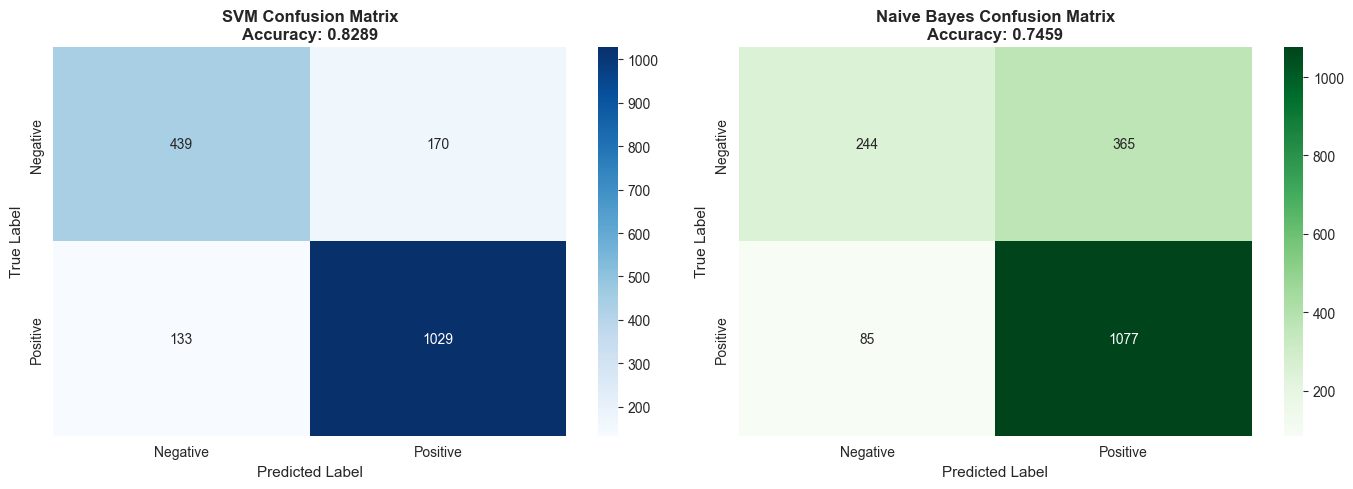

In [20]:
# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SVM Confusion Matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[0].set_title(f'SVM Confusion Matrix\nAccuracy: {svm_accuracy:.4f}', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# Naive Bayes Confusion Matrix
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[1].set_title(f'Naive Bayes Confusion Matrix\nAccuracy: {nb_accuracy:.4f}', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=11)
axes[1].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.show()


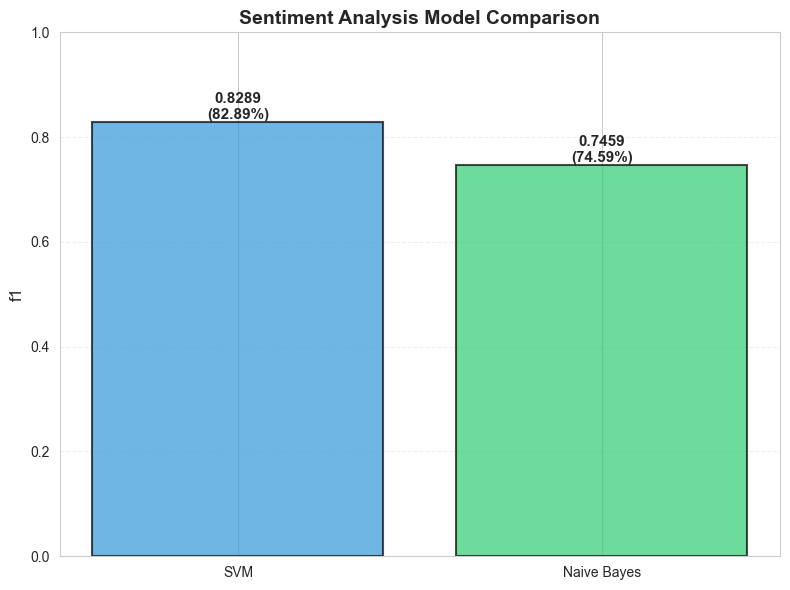

In [21]:
# Accuracy Comparison Bar Chart
fig, ax = plt.subplots(figsize=(8, 6))
models = ['SVM', 'Naive Bayes']
accuracies = [svm_accuracy, nb_accuracy]
colors = ['#3498db', '#2ecc71']

bars = ax.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_ylabel('f1', fontsize=12)
ax.set_title('Sentiment Analysis Model Comparison', fontsize=14, fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}\n({acc*100:.2f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
